# Anscombe-Quartett

Das Anscombe-Quartett bezieht sich auf vier fiktive Datensätze, die alle die gleichen statistischen Eigenschaften (wie Mittelwert, Standardabweichung, Korrelation) haben, aber sehr unterschiedliche grafische Darstellungen und Strukturen aufweisen. 
Das Quartett wurde 1973 von dem Statistiker Francis Anscombe erstellt, um die Bedeutung der Datenvisualisierung und die Gefahren der ausschließlichen Verwendung von deskriptiven Statistiken zu illustrieren.
Die vier Datensätze haben jeweils 11 Punkte und zwei Variablen. Obwohl die deskriptiven Statistiken für alle Datensätze ähnlich sind, zeigen die Streudiagramme, dass die Datensätze in Bezug auf Verteilung und Muster sehr unterschiedlich sind. Das Anscombe-Quartett unterstreicht die Wichtigkeit der Datenvisualisierung, um eine umfassendere und genaue Interpretation von Daten zu ermöglichen.
Es wird oft als Beispiel dafür verwendet, dass statistische Analysen allein nicht ausreichen, um die Natur von Daten zu verstehen, und dass visuelle Darstellungen eine entscheidende Rolle spielen, um Muster, Ausreißer und andere interessante Aspekte zu erkennen.

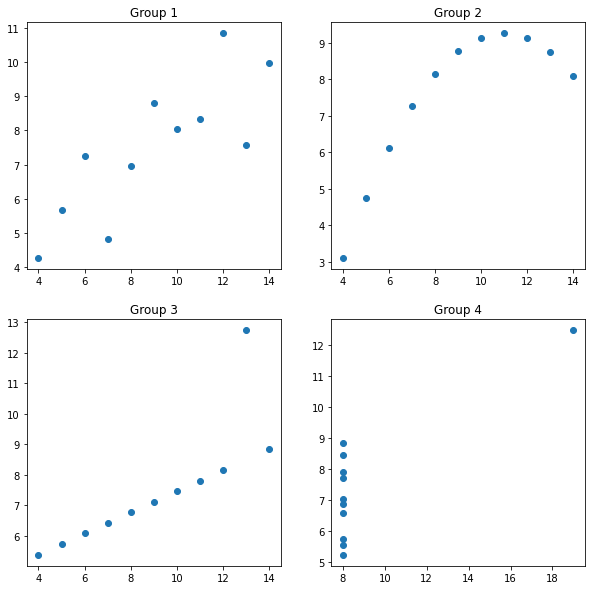

In [8]:
# seaborn kütüphanesini yükle
import seaborn as sns

# Das Anscombe veri kümesini yükle
anscombe = sns.load_dataset('anscombe')

# pandas kütüphanesini yükle
import pandas as pd

# veri kümesini dört gruba ayır
group_1 = anscombe[anscombe['dataset'] == 'I']
group_2 = anscombe[anscombe['dataset'] == 'II']
group_3 = anscombe[anscombe['dataset'] == 'III']
group_4 = anscombe[anscombe['dataset'] == 'IV']

# matplotlib kütüphanesini yükle
import matplotlib.pyplot as plt

# grafikleri çiz
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].plot(group_1['x'], group_1['y'], 'o')
axes[0, 0].set_title('Group 1')
axes[0, 1].plot(group_2['x'], group_2['y'], 'o')
axes[0, 1].set_title('Group 2')
axes[1, 0].plot(group_3['x'], group_3['y'], 'o')
axes[1, 0].set_title('Group 3')
axes[1, 1].plot(group_4['x'], group_4['y'], 'o')
axes[1, 1].set_title('Group 4')
plt.show()

Das erste Teildatenset ganz links ist so ungefähr das, was Data Scientists im Kopf haben, wenn sie an eine lineare Regression denken: Punkte liegen zufällig gestreut um die Regressionsgerade.

In allen anderen Datensets liegen die Punkte ganz und gar nicht zufällig gestreut um die Regressionsgerade. Im zweiten Datenset weisen sie eine deutliche Struktur auf. Ein lineares Modell mit einer einfachen Geraden ist keine gute Beschreibung der Daten. In diesem Fall sollte man eigentlich ein alternatives Modell wählen.

Im dritten Fall besteht sehr wohl eine lineare Abhängigkeit zwischen 'x' und 'y', doch sie ist nicht so stark wie von der Regressionsgeraden beschrieben. Ein einzelner extremer Datenpunkt, ein Ausreißer, zieht die Steigung der Regressionsgeraden nach oben.

Im vierten Teildatenset wird eine Assoziation zwischen 'x' und 'y' nur durch einen einzelnen Datenpunkt vorgegaukelt. Zehn der elf Datenpunkte liegen auf dem gleichen 'x'-Wert und lassen dadurch keinerlei Zusammenhang zwischen 'x' und 'y' erkennen.

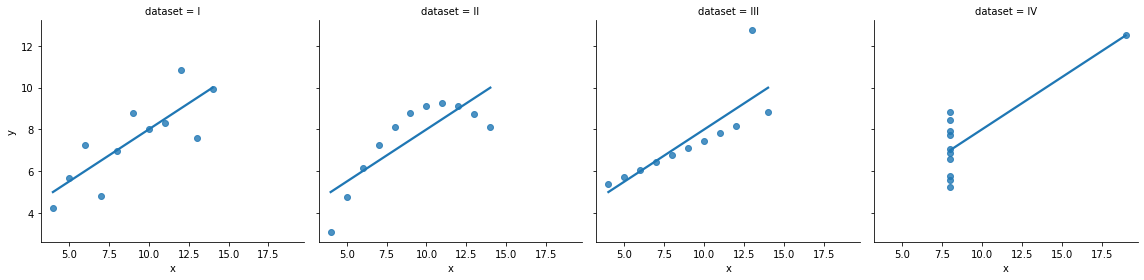

In [4]:
import seaborn as sns
df_anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x",
           y="y",
           col="dataset",
           data=df_anscombe,
           ci=None,
           height=4)

In [5]:
df_anscombe.head(20)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [6]:
df_anscombe.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for category in df_anscombe.loc[:, 'dataset'].unique():
    #print(category)
    
    # extract data for one quarter of anscombe's quartet
    mask = df_anscombe.loc[:, 'dataset']==category
    df_anscombe_cat = df_anscombe.loc[mask, :]
    
    # instantiate model
    model_tmp = LinearRegression()
    
    # feature matrix and target vector
    features = df_anscombe_cat.loc[:, ['x']]
    target = df_anscombe_cat.loc[:, 'y']
    
    # model fitting
    model_tmp.fit(features, target)
    
    print('Dataset: ', category)  # beta (slope)
    print('Slope: ', model_tmp.coef_)  # beta (slope)
    print('Intercept: ', model_tmp.intercept_)  # intercept
    
    # model accuracy
    target_pred = model_tmp.predict(features)
    print('MSE: ', mean_squared_error(target, target_pred))
    print('R2: ', r2_score(target, target_pred), '\n')

Dataset:  I
Slope:  [0.50009091]
Intercept:  3.0000909090909094
MSE:  1.2511536363636366
R2:  0.6665424595087748 

Dataset:  II
Slope:  [0.5]
Intercept:  3.00090909090909
MSE:  1.2523900826446281
R2:  0.6662420337274844 

Dataset:  III
Slope:  [0.49972727]
Intercept:  3.002454545454545
MSE:  1.2505628925619836
R2:  0.6663240410665592 

Dataset:  IV
Slope:  [0.49990909]
Intercept:  3.0017272727272726
MSE:  1.249317272727273
R2:  0.6667072568984653 

